In [73]:
import pandas as pd
import matplotlib as plt

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [161]:
df= pd.read_csv('New Data Cleaned Lyrics.csv', lineterminator='\n')


In [162]:
pd.set_option("display.max_columns", None)
df['target'] = 0
df.loc[df['Peak Position'] <= 25, 'target'] = 1
df.head(40)

,Unnamed: 0,Unnamed: 0.1,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,lyrics,target,lyricsNoLB,lyricsClean,Repetitiveness,avgWordLength,polarity,wordCount,words/duration,repDuration,repWordCount,tokens,lyricText
0,0,99272,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,99,Keep Me In Mind,Zac Brown Band,Keep Me In MindZac Brown Band,1,NaN,99,1,Zac Brown Band,Keep Me In Mind,"['contemporary country', 'country', 'country r...",7zNM46fo01dCBidY4yGNTZ,https://p.scdn.co/mp3-preview/beabe02cf782dd63...,214106.0,0.0,You Get What You Give (Deluxe),0.684,0.715,6.0,-6.132,1.0,0.0336,0.159000,0.000000,0.1810,0.5630,96.018,4.0,57.0,How come all the pretty girls like you are tak...,0,How come all the pretty girls like you are tak...,how come all the pretty girls like you are tak...,64.324746,3.534799,-0.076339,273,0.001275,137723.141296,175.606557,"['come', 'pretty', 'girl', 'like', 'taken', 'b...",come pretty girl like taken baby ive looking l...
1,1,30394,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,28,It Will Rain,Bruno Mars,It Will RainBruno Mars,1,NaN,28,1,Bruno Mars,It Will Rain,['pop'],0RUGuh2uSNFJpGMSsD1F5C,https://p.scdn.co/mp3-preview/3d9c0425bd0e1b23...,257720.0,0.0,The Twilight Saga: Breaking Dawn - Part 1 (Ori...,0.576,0.835,2.0,-6.826,1.0,0.0486,0.337000,0.000000,0.0820,0.4760,150.017,4.0,68.0,"If you ever leave me, baby,\nLeave some morphi...",0,"If you ever leave me, baby, Leave some morphin...",if you ever leave me baby leave some morphine ...,64.327485,3.904918,-0.195742,305,0.001183,165784.795322,196.198830,"['leave', 'baby', 'leave', 'morphine', 'door',...",leave baby leave morphine door cause lot medic...
2,2,81604,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,90,I Don't Want This Night To End,Luke Bryan,I Don't Want This Night To EndLuke Bryan,1,NaN,90,1,Luke Bryan,I Don't Want This Night To End,"['contemporary country', 'country', 'country r...",0cV4xwUA4ue2deqq4CZFko,NaN,219973.0,0.0,Tailgates & Tanlines,0.616,0.728,9.0,-4.020,0.0,0.0278,0.027500,0.000000,0.2280,0.3750,111.934,4.0,66.0,Girl I know I don't know you\nBut your pretty ...,0,Girl I know I don't know you But your pretty l...,girl i know i dont know you but your pretty li...,68.905473,3.685629,0.033719,334,0.001518,151573.435323,230.144279,"['girl', 'know', 'dont', 'know', 'pretty', 'li...",girl know dont know pretty little eye blue pul...
3,3,18390,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,62,5 O'Clock,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'ClockT-Pain Featuring Wiz Khalifa & Lily A...,1,NaN,62,1,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'Clock,"['dance pop', 'hip hop', 'pop', 'pop rap', 'r&...",6j236RwzFFj4wqH2tWJNBD,https://p.scdn.co/mp3-preview/a5f69f8dace0a712...,281533.0,1.0,5 O'Clock,0.400,0.882,7.0,-1.958,0.0,0.3340,0.168000,0.000000,0.1240,0.3850,167.114,4.0,61.0,\nIt's 5 o'clock in the morning\nConversation ...,0,It's 5 o'clock in the morning Conversation go...,its 5 oclock in the morning conversation got b...,72.461896,3.651276,-0.148797,823,0.002923,204004.150090,596.361405,"['5', 'oclock', 'morning', 'conversation', 'go...",5 oclock morning conversation got boring said ...
4,4,33717,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-22,51,I Like It Like That,Hot Chelle Rae Featuring New Boyz,I Like It Like ThatHot Chelle Rae Featuring Ne...,1,NaN,51,1,Hot Chelle Rae Featuring New Boyz,I Like It Like That,"['dance pop', 'neo mellow', 'neon pop punk', '...",6eFahAdQgABBj1XOM99cBG,https://p.scdn.co/mp3-preview/4888c97866712325...,188200.0,0.0,Whatever,0.742,0.784,1.0,-5.458,1.0,0.0552,0.030800,0.000000,0.3540,0.6500,101.

In [163]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'url', 'WeekID', 'Week Position',
       'Song_x', 'Performer_x', 'SongID', 'Instance', 'Previous Week Position',
       'Peak Position', 'Weeks on Chart', 'Performer_y', 'Song_y',
       'spotify_genre', 'spotify_track_id', 'spotify_track_preview_url',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'lyrics', 'target', 'lyricsNoLB', 'lyricsClean', 'Repetitiveness',
       'avgWordLength', 'polarity', 'wordCount', 'words/duration',
       'repDuration', 'repWordCount', 'tokens', 'lyricText'],
      dtype='object')

In [164]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1','Previous Week Position', 
              'spotify_genre', 'spotify_track_id', 'spotify_track_preview_url',
             'spotify_track_album', 'spotify_track_popularity'], axis = 1)

In [165]:
df.head()

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lyrics,target,lyricsNoLB,lyricsClean,Repetitiveness,avgWordLength,polarity,wordCount,words/duration,repDuration,repWordCount,tokens,lyricText
0,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,99,Keep Me In Mind,Zac Brown Band,Keep Me In MindZac Brown Band,1,99,1,Zac Brown Band,Keep Me In Mind,214106.0,0.0,0.684,0.715,6.0,-6.132,1.0,0.0336,0.1590,0.0,0.181,0.563,96.018,4.0,How come all the pretty girls like you are tak...,0,How come all the pretty girls like you are tak...,how come all the pretty girls like you are tak...,64.324746,3.534799,-0.076339,273,0.001275,137723.141296,175.606557,"['come', 'pretty', 'girl', 'like', 'taken', 'b...",come pretty girl like taken baby ive looking l...
1,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,28,It Will Rain,Bruno Mars,It Will RainBruno Mars,1,28,1,Bruno Mars,It Will Rain,257720.0,0.0,0.576,0.835,2.0,-6.826,1.0,0.0486,0.3370,0.0,0.082,0.476,150.017,4.0,"If you ever leave me, baby,\nLeave some morphi...",0,"If you ever leave me, baby, Leave some morphin...",if you ever leave me baby leave some morphine ...,64.327485,3.904918,-0.195742,305,0.001183,165784.795322,196.198830,"['leave', 'baby', 'leave', 'morphine', 'door',...",leave baby leave morphine door cause lot medic...
2,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,90,I Don't Want This Night To End,Luke Bryan,I Don't Want This Night To EndLuke Bryan,1,90,1,Luke Bryan,I Don't Want This Night To End,219973.0,0.0,0.616,0.728,9.0,-4.020,0.0,0.0278,0.0275,0.0,0.228,0.375,111.934,4.0,Girl I know I don't know you\nBut your pretty ...,0,Girl I know I don't know you But your pretty l...,girl i know i dont know you but your pretty li...,68.905473,3.685629,0.033719,334,0.001518,151573.435323,230.144279,"['girl', 'know', 'dont', 'know', 'pretty', 'li...",girl know dont know pretty little eye blue pul...
3,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,62,5 O'Clock,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'ClockT-Pain Featuring Wiz Khalifa & Lily A...,1,62,1,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'Clock,281533.0,1.0,0.400,0.882,7.0,-1.958,0.0,0.3340,0.1680,0.0,0.124,0.385,167.114,4.0,\nIt's 5 o'clock in the morning\nConversation ...,0,It's 5 o'clock in the morning Conversation go...,its 5 oclock in the morning conversation got b...,72.461896,3.651276,-0.148797,823,0.002923,204004.150090,596.361405,"['5', 'oclock', 'morning', 'conversation', 'go...",5 oclock morning conversation got boring said ...
4,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-22,51,I Like It Like That,Hot Chelle Rae Featuring New Boyz,I Like It Like ThatHot Chelle Rae Featuring Ne...,1,51,1,Hot Chelle Rae Featuring New Boyz,I Like It Like That,188200.0,0.0,0.742,0.784,1.0,-5.458,1.0,0.0552,0.0308,0.0,0.354,0.650,101.002,4.0,"Let's get it on, yeah, y'all can come along\nE...",0,"Let's get it on, yeah, y'all can come along Ev...",lets get it on yeah yall can come along everyb...,67.716535,3.549696,0.089755,493,0.002620,127442.519685,333.842520,"['let', 'yeah', 'yall', 'come', 'everybody', '...",let yeah yall come everybody drink bought bar ...


## EDA

In [166]:
df = df.dropna()

In [167]:
pd.set_option('display.max_columns', None)
df.head()

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lyrics,target,lyricsNoLB,lyricsClean,Repetitiveness,avgWordLength,polarity,wordCount,words/duration,repDuration,repWordCount,tokens,lyricText
0,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,99,Keep Me In Mind,Zac Brown Band,Keep Me In MindZac Brown Band,1,99,1,Zac Brown Band,Keep Me In Mind,214106.0,0.0,0.684,0.715,6.0,-6.132,1.0,0.0336,0.1590,0.0,0.181,0.563,96.018,4.0,How come all the pretty girls like you are tak...,0,How come all the pretty girls like you are tak...,how come all the pretty girls like you are tak...,64.324746,3.534799,-0.076339,273,0.001275,137723.141296,175.606557,"['come', 'pretty', 'girl', 'like', 'taken', 'b...",come pretty girl like taken baby ive looking l...
1,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,28,It Will Rain,Bruno Mars,It Will RainBruno Mars,1,28,1,Bruno Mars,It Will Rain,257720.0,0.0,0.576,0.835,2.0,-6.826,1.0,0.0486,0.3370,0.0,0.082,0.476,150.017,4.0,"If you ever leave me, baby,\nLeave some morphi...",0,"If you ever leave me, baby, Leave some morphin...",if you ever leave me baby leave some morphine ...,64.327485,3.904918,-0.195742,305,0.001183,165784.795322,196.198830,"['leave', 'baby', 'leave', 'morphine', 'door',...",leave baby leave morphine door cause lot medic...
2,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,90,I Don't Want This Night To End,Luke Bryan,I Don't Want This Night To EndLuke Bryan,1,90,1,Luke Bryan,I Don't Want This Night To End,219973.0,0.0,0.616,0.728,9.0,-4.020,0.0,0.0278,0.0275,0.0,0.228,0.375,111.934,4.0,Girl I know I don't know you\nBut your pretty ...,0,Girl I know I don't know you But your pretty l...,girl i know i dont know you but your pretty li...,68.905473,3.685629,0.033719,334,0.001518,151573.435323,230.144279,"['girl', 'know', 'dont', 'know', 'pretty', 'li...",girl know dont know pretty little eye blue pul...
3,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,62,5 O'Clock,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'ClockT-Pain Featuring Wiz Khalifa & Lily A...,1,62,1,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'Clock,281533.0,1.0,0.400,0.882,7.0,-1.958,0.0,0.3340,0.1680,0.0,0.124,0.385,167.114,4.0,\nIt's 5 o'clock in the morning\nConversation ...,0,It's 5 o'clock in the morning Conversation go...,its 5 oclock in the morning conversation got b...,72.461896,3.651276,-0.148797,823,0.002923,204004.150090,596.361405,"['5', 'oclock', 'morning', 'conversation', 'go...",5 oclock morning conversation got boring said ...
4,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-22,51,I Like It Like That,Hot Chelle Rae Featuring New Boyz,I Like It Like ThatHot Chelle Rae Featuring Ne...,1,51,1,Hot Chelle Rae Featuring New Boyz,I Like It Like That,188200.0,0.0,0.742,0.784,1.0,-5.458,1.0,0.0552,0.0308,0.0,0.354,0.650,101.002,4.0,"Let's get it on, yeah, y'all can come along\nE...",0,"Let's get it on, yeah, y'all can come along Ev...",lets get it on yeah yall can come along everyb...,67.716535,3.549696,0.089755,493,0.002620,127442.519685,333.842520,"['let', 'yeah', 'yall', 'come', 'everybody', '...",let yeah yall come everybody drink bought bar ...


In [168]:
##take a look at null count in each column to make a decision to drop any column with many values
#there seems to be no nulls in any column values which is good - no need to prune any column
df.isnull().sum()

url                          0
WeekID                       0
Week Position                0
Song_x                       0
Performer_x                  0
SongID                       0
Instance                     0
Peak Position                0
Weeks on Chart               0
Performer_y                  0
Song_y                       0
spotify_track_duration_ms    0
spotify_track_explicit       0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature               0
lyrics                       0
target                       0
lyricsNoLB                   0
lyricsClean                  0
Repetitiveness               0
avgWordLength                0
polarity                     0
wordCoun

In [169]:
df.head(20)

,url,WeekID,Week Position,Song_x,Performer_x,SongID,Instance,Peak Position,Weeks on Chart,Performer_y,Song_y,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,lyrics,target,lyricsNoLB,lyricsClean,Repetitiveness,avgWordLength,polarity,wordCount,words/duration,repDuration,repWordCount,tokens,lyricText
0,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,99,Keep Me In Mind,Zac Brown Band,Keep Me In MindZac Brown Band,1,99,1,Zac Brown Band,Keep Me In Mind,214106.0,0.0,0.684,0.715,6.0,-6.132,1.0,0.0336,0.159000,0.000000,0.1810,0.5630,96.018,4.0,How come all the pretty girls like you are tak...,0,How come all the pretty girls like you are tak...,how come all the pretty girls like you are tak...,64.324746,3.534799,-0.076339,273,0.001275,137723.141296,175.606557,"['come', 'pretty', 'girl', 'like', 'taken', 'b...",come pretty girl like taken baby ive looking l...
1,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,28,It Will Rain,Bruno Mars,It Will RainBruno Mars,1,28,1,Bruno Mars,It Will Rain,257720.0,0.0,0.576,0.835,2.0,-6.826,1.0,0.0486,0.337000,0.000000,0.0820,0.4760,150.017,4.0,"If you ever leave me, baby,\nLeave some morphi...",0,"If you ever leave me, baby, Leave some morphin...",if you ever leave me baby leave some morphine ...,64.327485,3.904918,-0.195742,305,0.001183,165784.795322,196.198830,"['leave', 'baby', 'leave', 'morphine', 'door',...",leave baby leave morphine door cause lot medic...
2,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,90,I Don't Want This Night To End,Luke Bryan,I Don't Want This Night To EndLuke Bryan,1,90,1,Luke Bryan,I Don't Want This Night To End,219973.0,0.0,0.616,0.728,9.0,-4.020,0.0,0.0278,0.027500,0.000000,0.2280,0.3750,111.934,4.0,Girl I know I don't know you\nBut your pretty ...,0,Girl I know I don't know you But your pretty l...,girl i know i dont know you but your pretty li...,68.905473,3.685629,0.033719,334,0.001518,151573.435323,230.144279,"['girl', 'know', 'dont', 'know', 'pretty', 'li...",girl know dont know pretty little eye blue pul...
3,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-15,62,5 O'Clock,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'ClockT-Pain Featuring Wiz Khalifa & Lily A...,1,62,1,T-Pain Featuring Wiz Khalifa & Lily Allen,5 O'Clock,281533.0,1.0,0.400,0.882,7.0,-1.958,0.0,0.3340,0.168000,0.000000,0.1240,0.3850,167.114,4.0,\nIt's 5 o'clock in the morning\nConversation ...,0,It's 5 o'clock in the morning Conversation go...,its 5 oclock in the morning conversation got b...,72.461896,3.651276,-0.148797,823,0.002923,204004.150090,596.361405,"['5', 'oclock', 'morning', 'conversation', 'go...",5 oclock morning conversation got boring said ...
4,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-22,51,I Like It Like That,Hot Chelle Rae Featuring New Boyz,I Like It Like ThatHot Chelle Rae Featuring Ne...,1,51,1,Hot Chelle Rae Featuring New Boyz,I Like It Like That,188200.0,0.0,0.742,0.784,1.0,-5.458,1.0,0.0552,0.030800,0.000000,0.3540,0.6500,101.002,4.0,"Let's get it on, yeah, y'all can come along\nE...",0,"Let's get it on, yeah, y'all can come along Ev...",lets get it on yeah yall can come along everyb...,67.716535,3.549696,0.089755,493,0.002620,127442.519685,333.842520,"['let', 'yeah', 'yall', 'come', 'everybody', '...",let yeah yall come everybody drink bought bar ...
5,http://www.billboard.com/charts/hot-100/2011-1...,2011-10-22,93,Dance (A$$),Big Sean Featuring Nicki Minaj,Dance (A$$)Big Sean Featuring Nicki Minaj,1,93,1,Big Sean Featuring Nicki Minaj,Dance (A$$),220293.0,1.0,0.822,0.711,11.0,-6.741,0.0,0.2750,0.028300,0.001290,0.2360,0.6810,79.949,4.0,\nAss \nStop... now make that motherfucker ham...,0,Ass Stop... now make that motherfucker hamme...,ass stop now make that motherfucker hammer tim...,62.400000,3.978261,-0.251825,368,0.001671,137462.832000,229.632000,"['as', 'stop', 'motherfucker', 'hammer', 't

In [170]:
#take a look at data types of each column before making any conversion of a feature/column data type
df.dtypes

url                           object
WeekID                        object
Week Position                  int64
Song_x                        object
Performer_x                   object
SongID                        object
Instance                       int64
Peak Position                  int64
Weeks on Chart                 int64
Performer_y                   object
Song_y                        object
spotify_track_duration_ms    float64
spotify_track_explicit       float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                         float64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
lyrics                        object
target                         int64
l

In [171]:
#convert the data type of 'track' and artist features from 'object' to string
df['Song_x'] = df['Song_x'].astype(str)
df['Performer_x'] = df['Performer_x'].astype(str)


<AxesSubplot:xlabel='count', ylabel='target'>

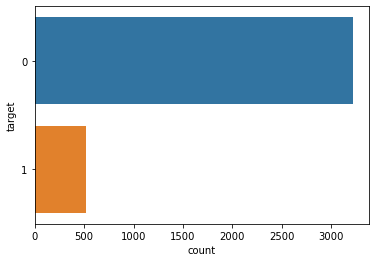

In [172]:
#the target column is nothing but popularity/hit feature with values of 0 or 1 indicateing flop or hit
sns.countplot(y="target", data=df,
              order=df.target.value_counts().iloc[:20].index)
#the output graph indicates there are almost equal hits and flops and hence is an even data set

array([[<AxesSubplot:title={'center':'Week Position'}>,
        <AxesSubplot:title={'center':'Instance'}>,
        <AxesSubplot:title={'center':'Peak Position'}>,
        <AxesSubplot:title={'center':'Weeks on Chart'}>,
        <AxesSubplot:title={'center':'spotify_track_duration_ms'}>],
       [<AxesSubplot:title={'center':'spotify_track_explicit'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:t

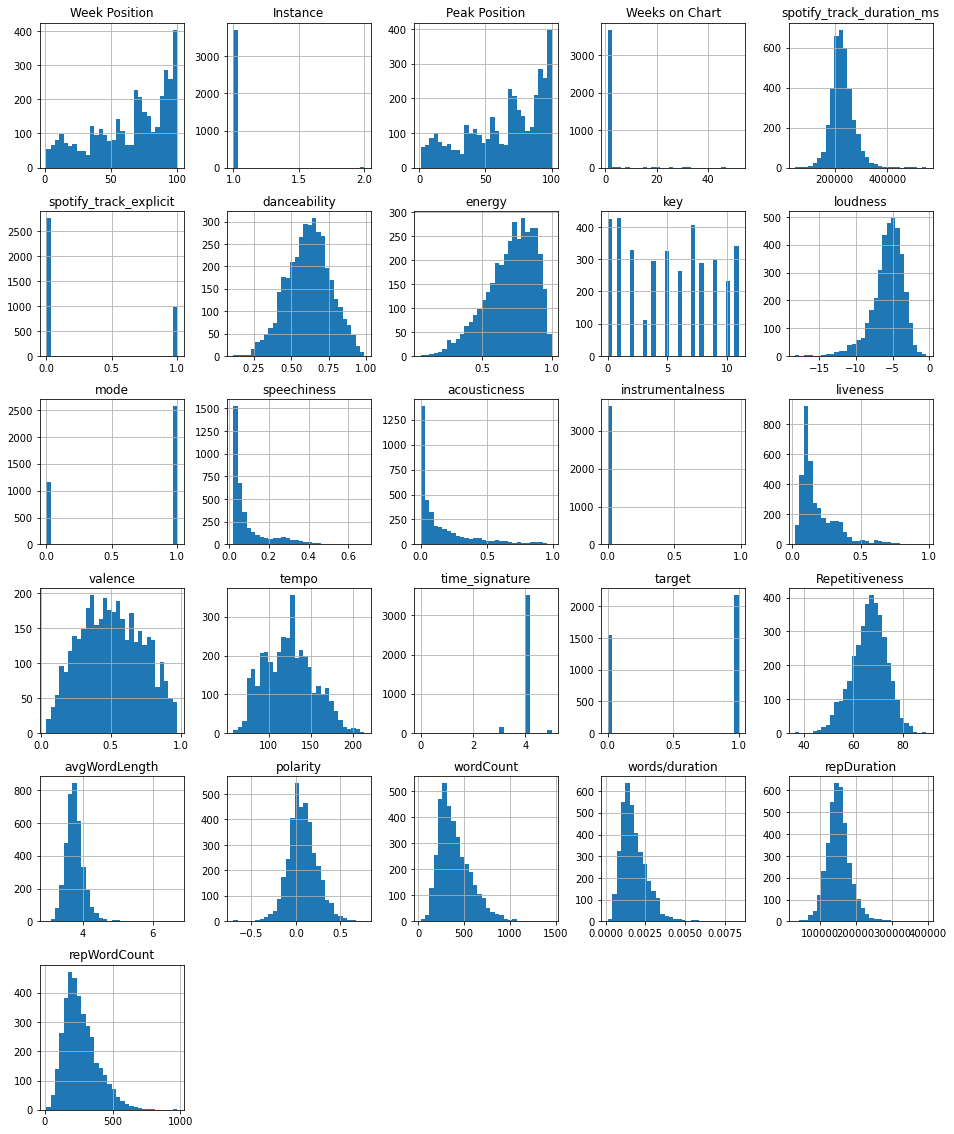

In [98]:
df.hist(figsize=(16,20), bins=30)

All tracks in the order of average danceability

In [173]:
df["Song_x"] = df["Song_x"].str.replace('\$\$','\\$\\$')

<ipython-input-173-e462b51e4e80>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Song_x"] = df["Song_x"].str.replace('\$\$','\\$\\$')


## Modelling

Take note of which percent of the songs in the dataset made it to the hits and flops.

Fro log reg check on the coefficients. But ensure scaling. 

In [174]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

#Running NMF only on hit songs
dfHit = df[df['target'] == 1]
dfHit = dfHit.reset_index(drop=True)
dfFlop = df[df['target'] == 0]
dfFlop = dfFlop.reset_index(drop=True)

# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=50, stop_words='english')
 
# Fit and transform TFIDF vector on lyricText column for hit songs DF
X = vect.fit_transform(dfHit['lyricText'])

In [175]:
def customNMF(X, topics):
    # Create an NMF instance: model
    # the 6 components will be the topics
    model = NMF(n_components=topics, random_state=0)

    # Fit the model to TF-IDF
    model.fit(X)

    # Transform the TF-IDF: nmf_features
    nmf_features = model.transform(X)
    
    # Create a DataFrame: components_df
    components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
    
    for topic in range(components_df.shape[0]):
        tmp = components_df.iloc[topic]
        print(f'For topic {topic+1} the words with the highest value are:')
        print(tmp.nlargest(10))
        print('\n')
    
    colNames = ["topic " + str(i) for i in range(1,topics+1)]
    
    nmfFeaturesDF = pd.DataFrame(data=nmf_features, columns=colNames)
    
    #Merge NMF features with hit song DF
    dfHitNLP = pd.merge(dfHit, nmfFeaturesDF, left_index=True, right_index=True)
    
    
    # Transform the TF-IDF for the flop df
    X = vect.transform(dfFlop['lyricText'])
    # Transform the flop TF-IDF into NMF features
    nmf_featuresFlop = model.transform(X)

    #Create dataframe of flop NMF features
    nmfFeaturesDFFlop  = pd.DataFrame(nmf_featuresFlop, columns=colNames)

    #merge dataframes
    dfFlopNLP = pd.merge(dfFlop, nmfFeaturesDFFlop, left_index=True, right_index=True)
    
    #Recombine hit and flop dataframes
    dfNLP = pd.concat([dfHitNLP, dfFlopNLP], ignore_index=True, sort=True)
    
    return dfNLP

In [177]:
df = customNMF(X,5)

/Users/mhgrody/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


For topic 1 the words with the highest value are:
im       1.341220
dont     0.827228
know     0.781300
like     0.606473
youre    0.561541
time     0.479942
got      0.470858
feel     0.431804
cause    0.431345
come     0.426487
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
yeah     1.213178
nigga    1.074396
bitch    0.617231
got      0.544222
im       0.471623
aint     0.465121
like     0.450325
shit     0.444082
fuck     0.400338
money    0.283564
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
oh         2.008009
yeah       0.257554
hey        0.185133
feel       0.179864
tonight    0.164923
time       0.164833
ooh        0.152046
let        0.144145
light      0.140496
baby       0.135152
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
love     1.565400
baby     0.410997
way      0.226287
ill      0.183499
yeah     0.180126
want     0.167968
world    0.167649
need     0.167186
girl     0.147817


In [178]:
df.isna().sum()

Instance                     0
Peak Position                0
Performer_x                  0
Performer_y                  0
Repetitiveness               0
SongID                       0
Song_x                       0
Song_y                       0
Week Position                0
WeekID                       0
Weeks on Chart               0
acousticness                 0
avgWordLength                0
danceability                 0
energy                       0
instrumentalness             0
key                          0
liveness                     0
loudness                     0
lyricText                    0
lyrics                       0
lyricsClean                  0
lyricsNoLB                   0
mode                         0
polarity                     0
repDuration                  0
repWordCount                 0
speechiness                  0
spotify_track_duration_ms    0
spotify_track_explicit       0
target                       0
tempo                        0
time_sig

In [179]:
X = df.drop(['Instance','Peak Position','Song_x', 'target', 'Song_y', 'SongID', 
             'lyrics', 'lyricsClean', 'tokens', 'lyricText', 'lyricsNoLB', 'Performer_x', 'Performer_y',
            'Week Position', 'WeekID', 'Weeks on Chart', 'url'], axis=1)
Y = df.target

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 99)

In [181]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [182]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 0)

lg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [183]:
y_pred_log = lg.predict(X_test)

In [184]:
from sklearn.metrics import confusion_matrix
conf_matrix_logistic = confusion_matrix(Y_test, y_pred_log)

In [185]:
conf_matrix_logistic

array([[807,   0],
       [128,   0]])

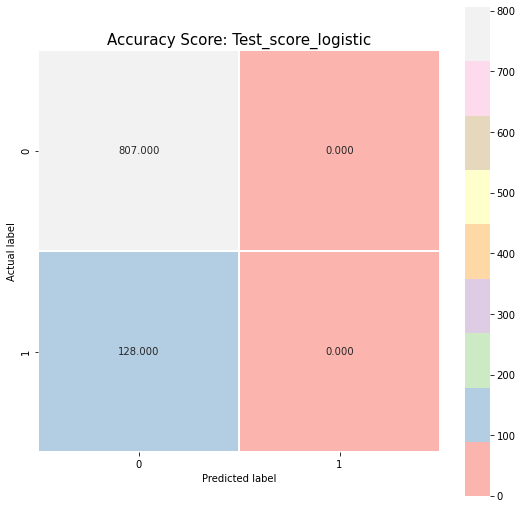

In [186]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix_logistic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('Test_score_logistic')
plt.title(all_sample_title, size = 15);
plt.draw()

In [187]:
from sklearn.metrics import accuracy_score
accuracy_score_logistic = accuracy_score(Y_test, y_pred_log)
accuracy_score_logistic

0.8631016042780749

In [188]:
from sklearn.metrics import precision_score
precision_score_logistic = precision_score(Y_test, y_pred_log)
precision_score_logistic

/Users/mhgrody/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [189]:
from sklearn.metrics import recall_score
recall_score_logistic = recall_score(Y_test, y_pred_log)
recall_score_logistic

0.0

In [190]:
from sklearn.metrics import f1_score
f1_score_logistic = f1_score(Y_test, y_pred_log)
f1_score_logistic

0.0

In [116]:
weight = lg.coef_

In [117]:
weight

array([[ 0.07823223,  0.03899317,  0.10836082,  0.2118028 , -0.06308577,
        -0.05897042,  0.04393767, -0.05580437, -0.11040771, -0.08439868,
        -0.06800487,  0.41911751, -0.58393656,  0.0825419 , -0.07020612,
         0.09431785,  0.04938278, -0.01915375,  0.23863268,  0.2703677 ,
         0.06208483,  0.11259766,  0.00246153, -0.17968079, -0.53617436,
         1.16372784]])

In [118]:
logReg_coeff = pd.DataFrame({'feature_name': X.columns, 'model_coefficient': weight.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)

<ipython-input-119-1121eac97a43>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg3.set_yticklabels(fontsize=10, labels=logReg_coeff.model_coefficient)


[Text(0, -0.75, '1.163727840994341'),
 Text(0, -0.5, '0.4191175085514584'),
 Text(0, -0.25, '0.2703677006003196'),
 Text(0, 0.0, '0.2386326821013878'),
 Text(0, 0.25, '0.21180280436038426'),
 Text(0, 0.5, '0.11259766272043162'),
 Text(0, 0.75, '0.1083608199828225'),
 Text(0, 1.0, '0.09431785172796245'),
 Text(0, 1.25, '0.08254189667973512'),
 Text(0, 1.5, '0.07823222964976441')]

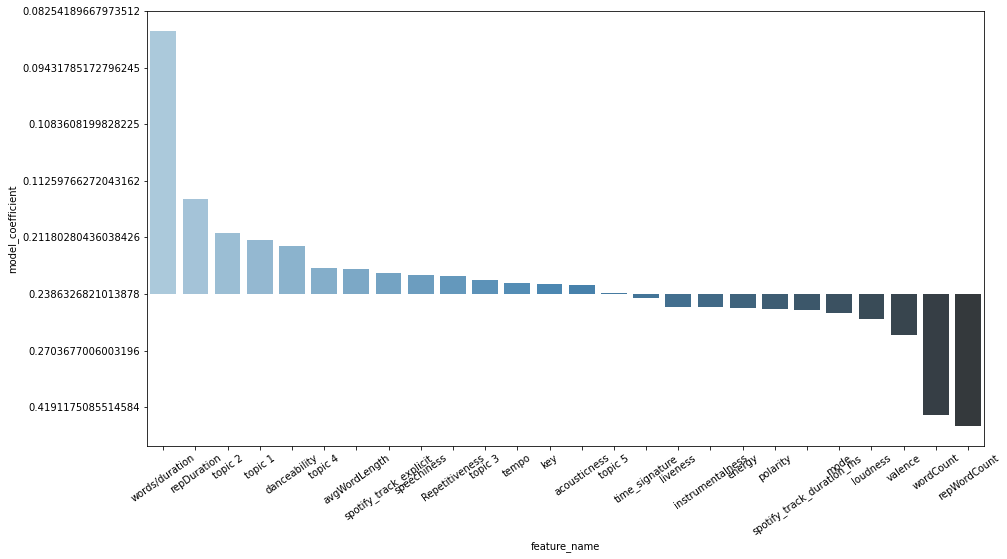

In [119]:
plt.figure().set_size_inches(15, 8)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff, palette="Blues_d")
fg3.set_xticklabels(rotation=35, fontsize=10, labels=logReg_coeff.feature_name)
fg3.set_yticklabels(fontsize=10, labels=logReg_coeff.model_coefficient)

The top nodes on the decision tree would help get an idea of which features

In [120]:
dlf = DecisionTreeClassifier(max_leaf_nodes=10, random_state = 1)
dlf.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

In [121]:
y_pred_dlf = dlf.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix
conf_dlf_matrix_logistic = confusion_matrix(Y_test, y_pred_dlf)

In [123]:
conf_dlf_matrix_logistic

array([[115, 270],
       [107, 443]])

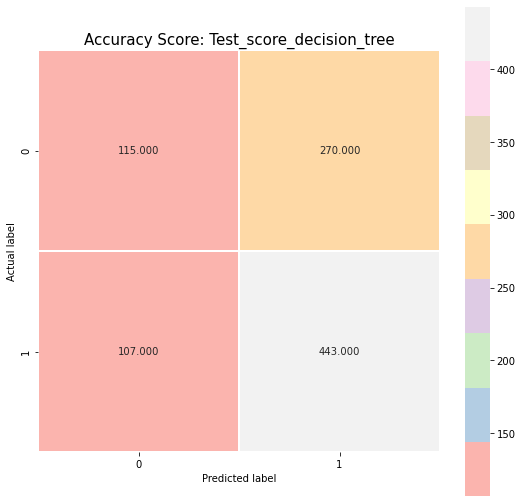

In [124]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_dlf_matrix_logistic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('Test_score_decision_tree')
plt.title(all_sample_title, size = 15);
plt.draw()

In [125]:
accuracy_score_dlf = accuracy_score(Y_test, y_pred_dlf)
accuracy_score_dlf

0.5967914438502674

In [126]:
precision_score_dlf = precision_score(Y_test, y_pred_dlf)
precision_score_dlf

0.6213183730715287

In [127]:
recall_score_dlf = recall_score(Y_test, y_pred_dlf)
recall_score_dlf

0.8054545454545454

In [128]:
f1_score_dlf = f1_score(Y_test, y_pred_dlf)
f1_score_dlf

0.7015043547110055

In [59]:
from sklearn import tree

In [60]:
df.head()

,Instance,Peak Position,Performer_x,Performer_y,Repetitiveness,SongID,Song_x,Song_y,Week Position,WeekID,Weeks on Chart,acousticness,avgWordLength,danceability,energy,instrumentalness,key,liveness,loudness,lyricText,lyrics,lyricsClean,lyricsNoLB,mode,polarity,repDuration,repWordCount,speechiness,spotify_track_duration_ms,spotify_track_explicit,target,tempo,time_signature,tokens,topic 1,topic 2,topic 3,topic 4,topic 5,url,valence,wordCount,words/duration
0,1,28,Bruno Mars,Bruno Mars,64.327485,It Will RainBruno Mars,It Will Rain,It Will Rain,28,2011-10-15,1,0.337000,3.904918,0.576,0.835,0.000000,2.0,0.0820,-6.826,leave baby leave morphine door cause lot medic...,"If you ever leave me, baby,\nLeave some morphi...",if you ever leave me baby leave some morphine ...,"If you ever leave me, baby, Leave some morphin...",1.0,-0.195742,165784.795322,196.198830,0.0486,257720.0,0.0,1,150.017,4.0,"['leave', 'baby', 'leave', 'morphine', 'door',...",0.090672,0.000000,0.003807,0.012626,0.039033,http://www.billboard.com/charts/hot-100/2011-1...,0.476,305,0.001183
1,1,41,Daughtry,Daughtry,72.498427,Crawling Back To YouDaughtry,Crawling Back To You,Crawling Back To You,41,2011-10-22,1,0.006740,3.656627,0.438,0.919,0.000000,0.0,0.1580,-2.910,lesson learned bridge burned ground late fire ...,Lessons learned\nAnd bridges burned\nTo the gr...,lessons learned and bridges burned to the grou...,Lessons learned And bridges burned To the grou...,0.0,-0.086000,163710.872247,240.694777,0.0495,225813.0,0.0,1,151.026,4.0,"['lesson', 'learned', 'bridge', 'burned', 'gro...",0.076307,0.067849,0.000000,0.053842,0.013286,http://www.billboard.com/charts/hot-100/2011-1...,0.195,332,0.001470
2,1,43,The Fray,The Fray,72.394541,HeartbeatThe Fray,Heartbeat,Heartbeat,43,2011-10-29,1,0.000594,3.903125,0.458,0.821,0.000095,9.0,0.1610,-5.076,open bed truck highway rain coming run think f...,We're on an open bed truck on the highway\nThe...,were on an open bed truck on the highway the r...,We're on an open bed truck on the highway The ...,1.0,0.268534,159769.684243,231.662531,0.0334,220693.0,0.0,1,144.460,4.0,"['open', 'bed', 'truck', 'highway', 'rain', 'c...",0.046519,0.008250,0.004136,0.045780,0.216169,http://www.billboard.com/charts/hot-100/2011-1...,0.323,320,0.001450
3,1,10,Snoop Dogg & Wiz Khalifa Featuring Bruno Mars,Snoop Dogg & Wiz Khalifa Featuring Bruno Mars,63.164300,"Young, Wild & FreeSnoop Dogg & Wiz Khalifa Fea...","Young, Wild & Free","Young, Wild & Free",10,2011-10-29,1,0.052500,3.648752,0.715,0.655,0.000000,0.0,0.1150,-6.425,thing word drunk smoke weed having fun dont ca...,\nIs this thing on? Word\n\n\nSo what we get d...,is this thing on word so what we get drunk so ...,Is this thing on? Word So what we get drunk...,1.0,0.133595,130960.438540,329.086004,0.1370,207333.0,1.0,1,95.078,4.0,"['thing', 'word', 'drunk', 'smoke', 'weed', 'h...",0.064006,0.088829,0.000000,0.000000,0.000000,http://www.billboard.com/charts/hot-100/2011-1...,0.531,521,0.002513
4,1,11,Justin Bieber,Justin Bieber,73.090278,MistletoeJustin Bieber,Mistletoe,Mistletoe,11,2011-11-05,1,0.498000,4.137195,0.658,0.560,0.000000,6.0,0.0794,-9.049,beautiful time year light fill street spreadin...,Itâs the most beautiful time of the year\nLi...,its the most beautiful time of the year lights...,Itâs the most beautiful time of the year Lig...,0.0,0.407857,133715.739583,239.736111,0.0467,182946.0,0.0,1,161.994,4.0,"['beautiful', 'time', 'year', 'light', 'fill',...",0.081159,0.000000,0.005058,0.007970,0.105468,http://www.billboard.com/charts/hot-100/2011-1...,0.854,328,0.001793


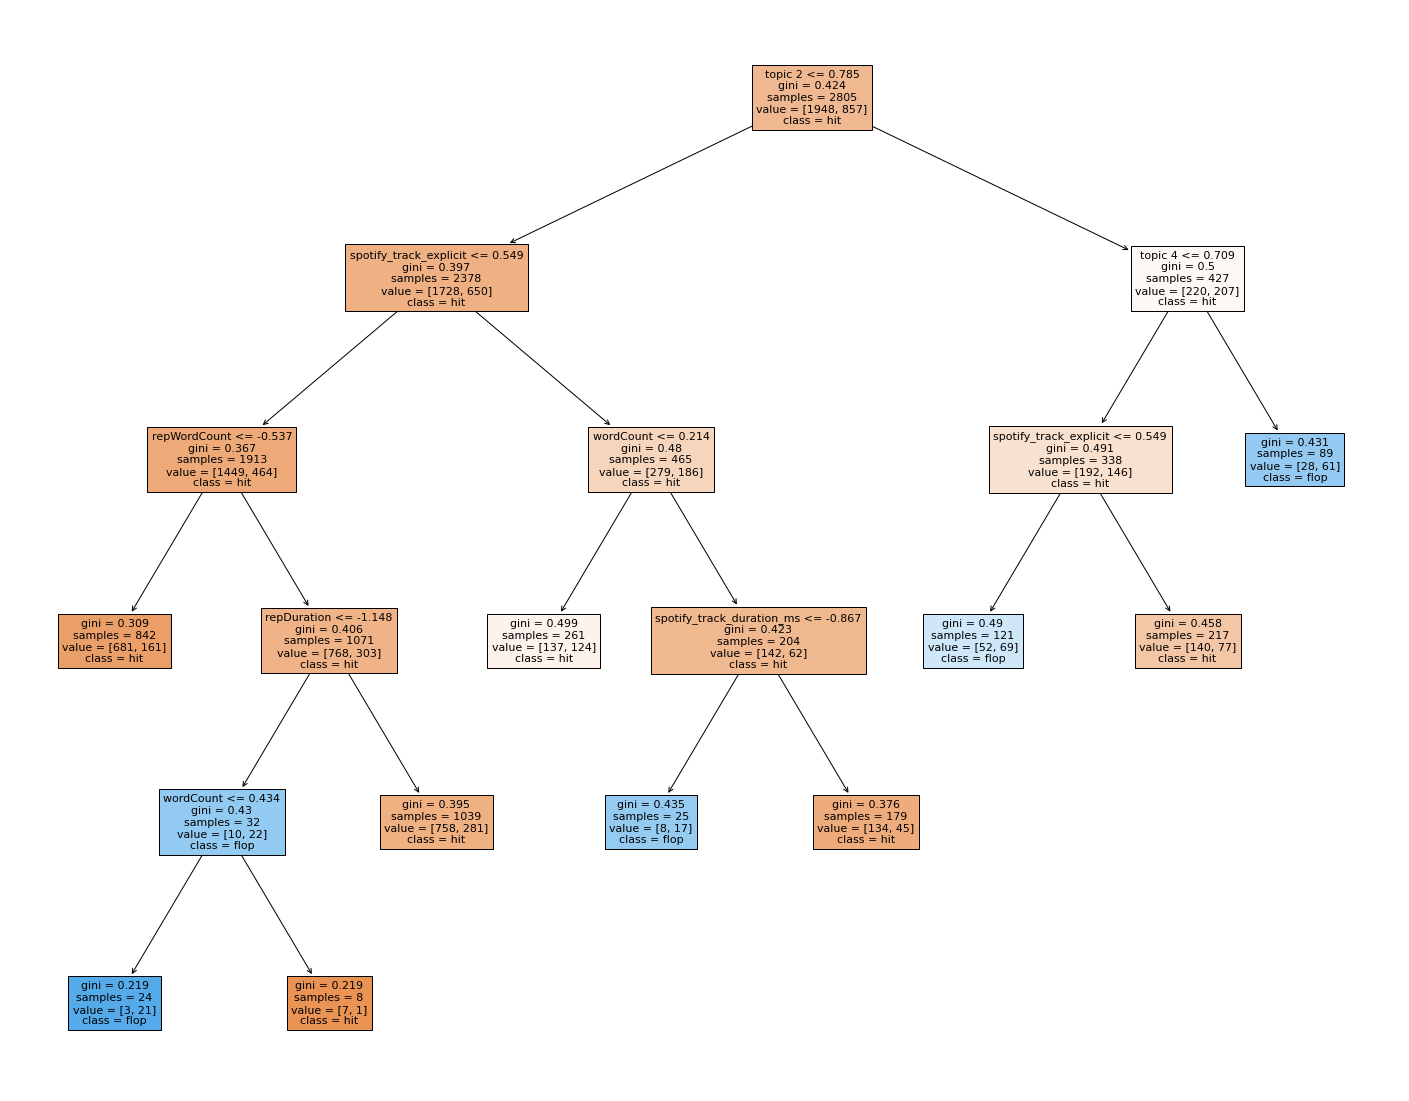

In [61]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dlf, 
                   feature_names=X.columns,  
                   class_names=['hit', 'flop'],
                   filled=True)
fig.savefig('Decision_Tree.png')

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [129]:
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [130]:
y_predict_rf_base = random_forest.predict(X_test)
accuracy_score(Y_test, y_predict_rf_base)

0.5796791443850268

In [59]:
best_random = rf_random.best_estimator_
y_predict_rf = best_random.predict(X_test)
accuracy_score(Y_test, y_predict_rf)

0.8829100301334482

In [60]:
best_random

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400)

In [61]:
CM_rf = confusion_matrix(Y_test, y_predict_rf)

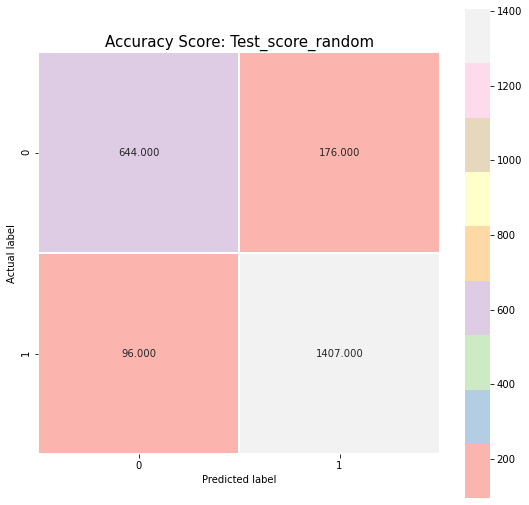

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(CM_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format('Test_score_random')
plt.title(all_sample_title, size = 15);
plt.draw()

In [63]:
accuracy_score_rf = accuracy_score(Y_test, y_predict_rf)
accuracy_score_rf

0.8829100301334482

In [64]:
precision_score_rf = precision_score(Y_test, y_predict_rf)
precision_score_rf

0.8888186986734049

In [65]:
recall_score_rf = recall_score(Y_test, y_predict_rf)
recall_score_rf

0.936127744510978

In [66]:
f1_score_rf = f1_score(Y_test, y_predict_rf)
f1_score_rf

0.9118600129617628

In [67]:
best_random.feature_importances_

array([0.06221991, 0.05869974, 0.05469593, 0.04055127, 0.01542802,
       0.04919803, 0.02831893, 0.05219196, 0.12894563, 0.00937672,
       0.01620977, 0.03001956, 0.00322313, 0.01816221, 0.02786804,
       0.06961895, 0.00990606, 0.03215451, 0.01677952, 0.00169505,
       0.0224388 , 0.0155197 , 0.01173061, 0.01433799, 0.01833959,
       0.02352277, 0.07228988, 0.09655771])

<BarContainer object of 28 artists>

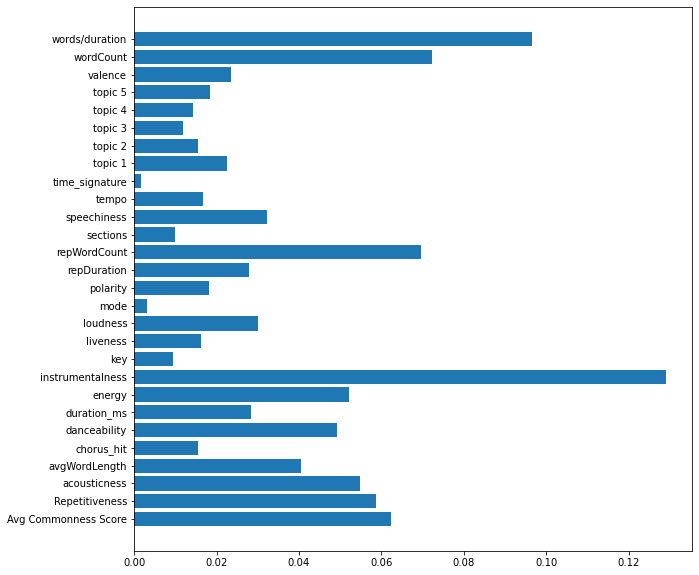

In [69]:
plt.figure(figsize=(10,10))
plt.barh(X.columns, best_random.feature_importances_)

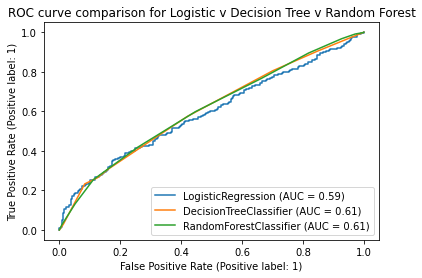

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
lg_plot = plot_roc_curve(lg, X_test, Y_test) 
dt_plot = plot_roc_curve(dlf, X_test, Y_test, ax = lg_plot.ax_)
rf_plot = plot_roc_curve(random_forest, X_test, Y_test, ax = dt_plot.ax_)
plt.title('ROC curve comparison for Logistic v Decision Tree v Random Forest')
plt.show()

In [67]:
df['key'].unique()

array([ 2.,  0.,  9.,  6.,  4.,  8.,  7.,  1., 11.,  5., 10.,  3.])

In [68]:
import xgboost as xgb # XGBoost stuff
xgbCF = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", 
                            seed=42, 
                            use_label_encoder=False)


xgbCF.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [74]:
import xgboost as xgb 

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", 
                            seed=42, 
                            use_label_encoder=False)


clf = RandomizedSearchCV(estimator=clf_xgb,
                         param_distributions=params,
                         n_iter=10,
                         verbose=1)

clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                           validate_para

In [90]:
best_random_xgb = clf.best_estimator_
best_random_xgb

XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.8999999999999999, colsample_bynode=1,
              colsample_bytree=0.7, eval_metric='logloss', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=0.8999999999999999, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [91]:
y_predict_Tunedxgb = best_random_xgb.predict(X_test)

accuracy_score_Tunedxgb = accuracy_score(Y_test, y_predict_Tunedxgb)
accuracy_score_Tunedxgb

0.8846319414550151

In [69]:
y_predict_xgb = xgbCF.predict(X_test)

accuracy_score_xgb = accuracy_score(Y_test, y_predict_xgb)
accuracy_score_xgb

0.7005347593582888

In [71]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_predict_xgb, target_names=target_names))
              

              precision    recall  f1-score   support

     class 0       0.74      0.87      0.80       643
     class 1       0.53      0.32      0.40       292

    accuracy                           0.70       935
   macro avg       0.64      0.60      0.60       935
weighted avg       0.68      0.70      0.68       935



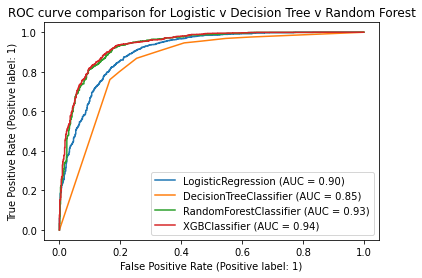

In [93]:
lg_plot = plot_roc_curve(lg, X_test, Y_test) 
dt_plot = plot_roc_curve(dlf, X_test, Y_test, ax = lg_plot.ax_)
rf_plot = plot_roc_curve(best_random, X_test, Y_test, ax = dt_plot.ax_)
xgb_plot = plot_roc_curve(best_random_xgb, X_test, Y_test, ax = rf_plot.ax_)
plt.title('ROC curve comparison for Logistic v Decision Tree v Random Forest')
plt.show()

In [80]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier



estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = xgb.XGBClassifier()
estimators.append(('xgb', model2))
model3 = RandomForestClassifier()
estimators.append(('rf', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, Y_train)

/Users/mhgrody/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:36:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
               

In [81]:
y_predict_stack = ensemble.predict(X_test)

accuracy_score_stack = accuracy_score(Y_test, y_predict_stack)
accuracy_score_stack

0.8829100301334482

In [82]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_predict_stack, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.79      0.83       820
     class 1       0.89      0.94      0.91      1503

    accuracy                           0.88      2323
   macro avg       0.88      0.86      0.87      2323
weighted avg       0.88      0.88      0.88      2323



In [83]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_predict_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.79      0.83       820
     class 1       0.89      0.94      0.91      1503

    accuracy                           0.88      2323
   macro avg       0.88      0.86      0.87      2323
weighted avg       0.88      0.88      0.88      2323



In [84]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_pred_log, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.71      0.77       820
     class 1       0.86      0.93      0.89      1503

    accuracy                           0.85      2323
   macro avg       0.85      0.82      0.83      2323
weighted avg       0.85      0.85      0.85      2323



In [85]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, y_pred_dlf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.67      0.73       820
     class 1       0.83      0.91      0.87      1503

    accuracy                           0.82      2323
   macro avg       0.82      0.79      0.80      2323
weighted avg       0.82      0.82      0.82      2323

